# 📊 Customer & Churn Analytics Dashboard  

## 🏢 Contexto del Proyecto  
Este proyecto analiza la información de **7043 clientes de una compañía de telecomunicaciones en California** durante el tercer trimestre.  
El objetivo es **comprender el perfil de clientes, identificar patrones de cancelación (churn)** y **cuantificar el impacto económico** de estas bajas.  

El dashboard es una herramienta de apoyo a la **toma de decisiones estratégicas y operativas**, permitiendo a los equipos de negocio y marketing:  
- Monitorear el **estado de la base de clientes**.  
- Identificar **drivers de cancelación**.  
- Detectar **clientes en riesgo**.  
- Diseñar **acciones de retención y optimización de ingresos**.  

---

## 🎯 Objetivos del Dashboard  
1. **Visión global** del negocio: clientes activos, ingresos y tasa de churn.  
2. **Análisis de cancelaciones** (churn) por segmentos, servicios y métodos de pago.  
3. **Perfil de clientes**: características demográficas y geográficas.  
4. **Impacto económico**: ingresos y CLTV perdidos por churn.  
5. **Predicción y riesgo**: clientes más propensos a abandonar la compañía.  

---

## 📌 Principales KPIs  

| Categoría | KPI |
|-----------|--------------------------------------------|
| 👥 Clientes | Clientes activos, Clientes perdidos (churn), Tasa de churn (%) |
| 💰 Ingresos | Ingresos mensuales totales, ARPU (Average Revenue per User) |
| 📈 Rentabilidad | CLTV promedio, CLTV perdido por churn |
| ⚠️ Riesgo | Churn Score promedio, % clientes en riesgo alto |
| 📑 Segmentación | Churn por contrato, método de pago, servicios contratados |

---

## 📈 Visualizaciones Incluidas  

- **Cards de KPIs clave** (clientes, ingresos, churn rate, CLTV).  
- **Evolución temporal del churn** (línea).  
- **Mapa geográfico** con intensidad de churn por ciudad.  
- **Ranking de razones de cancelación** (barras).  
- **Boxplots y distribuciones** de Monthly Charges y CLTV.  
- **Heatmaps** de churn por contrato y método de pago.  
- **Scatter plot** CLTV vs Churn Score (segmentación de clientes en riesgo).  

---

## 👥 Beneficios para el Cliente  

✅ **Decisiones basadas en datos**: identificar dónde y por qué se están perdiendo clientes.  
✅ **Priorización inteligente**: enfocar esfuerzos de retención en clientes de alto valor.  
✅ **Optimización de ingresos**: entender qué servicios y contratos generan mayor estabilidad.  
✅ **Visión integral**: combinar insights demográficos, geográficos y económicos en un solo panel.  

---

## 🛠️ Stack Tecnológico  

| Componente | Herramienta |
|------------|----------------------------------|
| Lenguajes | Python (Pandas, NumPy, Scikit-learn) |
| Visualización | Plotly / Streamlit / Power BI |
| Base de datos | SQL |
| Dataset | 7043 registros, 33 variables (clientes de telecomunicaciones) |

---

## 🚀 Próximos Pasos  

1. Validar con el cliente los **KPIs prioritarios**.  
2. Definir la **plataforma de despliegue** (ej. Streamlit, Power BI, Tableau).  
3. Implementar el **dashboard interactivo**.  
4. Capacitar al equipo de negocio en la interpretación de métricas.  



# 1.Librerias

In [1]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd #manejo de estructura de datos tabulares
import numpy as np # manejo de arrays y operaciones matemáticas

# libreria para transformar las columnas latitud y longitud en geometrias
# -----------------------------------------------------------------------
import geopandas as gpd

# libreria para crear mapas interactivos
# -----------------------------------------------------------------------
import folium
from folium.plugins import HeatMap, MarkerCluster


# librerias para visualizar datos
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud


# Libreria para acceder a funciones del sistema 
# -----------------------------------------------------------------------
import sys 
sys.path.append("../")
import src.suport as sp


# Warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Configuracion de pandas
# -----------------------------------------------------------------------
pd.options.display.max_columns = None


# 2.Carga de datos

In [2]:
# cargamos los datos de churn_limpio.pkl
df = pd.read_pickle("../data/output/churn_limpio.pkl")
df.reset_index(inplace=True)
df

,index,city,zip_code,lat_long,latitude,longitude,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,total_charges,churn_label,churn_value,cltv,churn_reason,tenure_months,monthly_charges,churn_score
0,0,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes,1.0,3239.0,Competitor made better offer,2.0,53.85,86.0
1,1,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes,1.0,2701.0,Moved,2.0,70.70,67.0
2,2,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,820.5,Yes,1.0,5372.0,Moved,8.0,99.65,86.0
3,3,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,3046.05,Yes,1.0,5003.0,Moved,28.0,104.80,84.0
4,4,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,Male,NaN,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),5036.3,Yes,1.0,5340.0,Competitor had better devices,49.0,103.70,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,Bakersfield,93304.0,"35.339796, -119.023552",35.339796,-119.023552,Male,No,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),1725,No,0.0,5449.0,NaN,65.0,25.10,46.0
7039,7039,Sylmar,91342.0,"34.321621, -118.399841",34.321621,-118.399841,Female,No,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),7939.25,No,0.0,6424.0,NaN,70.0,113.65,75.0
7040,7040,Westminster,92683.0,"33.752591, -117.993661",33.752591,-117.993661,Female,No,Yes,No,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),1905.7,No,0.0,3596.0,NaN,26.0,73.50,67.0
7041,7041,Santa Maria,93454.0,"34.943523, -120.256729",34.943523,-120.256729,Male,No,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,550.6,No,0.0,4024.0,NaN,5.0,105.30,66.0


> Separamos los datos nulos correpondientes a la variable CLTV ya que seran los que usaremos para predecir el valor de CLTV en proximos notebooks. 

In [3]:
# data quality
data_quality = df[df["cltv"].isnull()]
data_quality

,index,city,zip_code,lat_long,latitude,longitude,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,total_charges,churn_label,churn_value,cltv,churn_reason,tenure_months,monthly_charges,churn_score
153,153,Wofford Heights,93285.0,"35.690535, -118.552784",35.690535,-118.552784,Female,No,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),270.7,Yes,1.0,NaN,Competitor offered higher download speeds,3.0,75.10,69.0
188,188,Fresno,93711.0,"36.833002, -119.82947",36.833002,-119.829470,Female,No,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),229.6,Yes,1.0,NaN,Competitor offered higher download speeds,12.0,19.80,94.0
907,907,Victorville,92394.0,"34.567058, -117.362329",34.567058,-117.362329,Male,Yes,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3496.3,Yes,1.0,NaN,Competitor offered more data,35.0,101.40,92.0
1151,1151,Williams,95987.0,"39.117537, -122.284654",39.117537,-122.284654,Male,NaN,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,545.15,Yes,1.0,NaN,Lack of self-service on Website,7.0,73.75,84.0
3075,3075,Pioneertown,92268.0,"34.201108, -116.593456",34.201108,-116.593456,Male,No,No,No,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,No,Month-to-month,No,Mailed check,4669.2,No,0.0,NaN,NaN,47.0,100.75,27.0
3122,3122,San Bernardino,92410.0,"34.106922, -117.297553",34.106922,-117.297553,Male,No,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,341.35,No,0.0,NaN,NaN,16.0,20.15,58.0
3469,3469,San Leandro,94577.0,"37.717196, -122.159338",37.717196,-122.159338,Female,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.8,No,0.0,NaN,NaN,1.0,19.80,22.0
5573,5573,King City,93930.0,"36.220761, -120.980777",36.220761,-120.980777,Female,No,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),8250,No,0.0,NaN,NaN,70.0,115.15,80.0
5599,5599,San Bruno,94066.0,"37.624436, -122.430661",37.624436,-122.430661,Female,No,No,No,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,720.1,No,0.0,NaN,NaN,15.0,48.80,57.0
6008,6008,Oregon House,95962.0,"39.342587, -121.249833",39.342587,-121.249833,Female,No,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,One year,No,Bank transfer (automatic),5811.8,No,0.0,NaN,NaN,60.0,94.15,60.0


In [4]:
# eliminamos los registros de data_quality
df = df.drop(data_quality.index)
df

,index,city,zip_code,lat_long,latitude,longitude,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,total_charges,churn_label,churn_value,cltv,churn_reason,tenure_months,monthly_charges,churn_score
0,0,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes,1.0,3239.0,Competitor made better offer,2.0,53.85,86.0
1,1,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes,1.0,2701.0,Moved,2.0,70.70,67.0
2,2,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,820.5,Yes,1.0,5372.0,Moved,8.0,99.65,86.0
3,3,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,3046.05,Yes,1.0,5003.0,Moved,28.0,104.80,84.0
4,4,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,Male,NaN,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),5036.3,Yes,1.0,5340.0,Competitor had better devices,49.0,103.70,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,Bakersfield,93304.0,"35.339796, -119.023552",35.339796,-119.023552,Male,No,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),1725,No,0.0,5449.0,NaN,65.0,25.10,46.0
7039,7039,Sylmar,91342.0,"34.321621, -118.399841",34.321621,-118.399841,Female,No,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),7939.25,No,0.0,6424.0,NaN,70.0,113.65,75.0
7040,7040,Westminster,92683.0,"33.752591, -117.993661",33.752591,-117.993661,Female,No,Yes,No,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),1905.7,No,0.0,3596.0,NaN,26.0,73.50,67.0
7041,7041,Santa Maria,93454.0,"34.943523, -120.256729",34.943523,-120.256729,Male,No,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,550.6,No,0.0,4024.0,NaN,5.0,105.30,66.0


## 3.Resumen Ejecutivo

In [5]:
sp.data_resume(df)

,count,null,null_%,dtype,unique
churn_reason,1845,5188,0.7377,object,20
contract,6974,59,0.0084,object,3
dependents,6974,59,0.0084,object,2
device_protection,6983,50,0.0071,object,3
total_charges,6983,50,0.0071,object,6478
multiple_lines,6986,47,0.0067,object,3
tech_support,6986,47,0.0067,object,3
streaming_movies,6987,46,0.0065,object,3
partner,6989,44,0.0063,object,2
senior_citizen,6997,36,0.0051,object,2


## 3.1 Comparación entre Clientes Activos y Churned

> Clientes activos:


In [6]:
# 1. CLIENTES ACTIVOS Y PERDIDOS
clientes_activos = len(df[df['churn_value'] == 0])
clientes_perdidos = len(df[df['churn_value'] == 1])
total_clientes = len(df)

print(f"Total de Clientes: {total_clientes}")
print(f"Clientes Activos: {clientes_activos}")
print(f"Clientes Perdidos: {clientes_perdidos}")

Total de Clientes: 7033
Clientes Activos: 5168
Clientes Perdidos: 1865


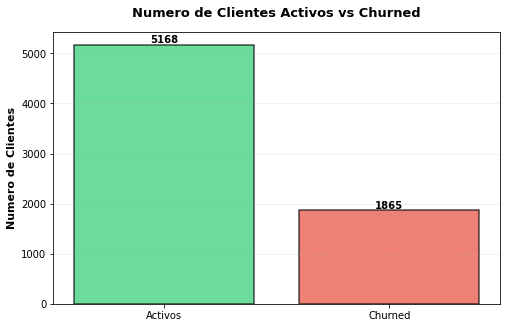

In [7]:
# COLOR PALETTE
color_activos = '#2ecc71'
color_churned = '#e74c3c'
color_total = '#3498db'


plt.figure(figsize=(8, 5))
categories = ['Activos', 'Churned']
churn_values = [clientes_activos, clientes_perdidos]
colors_bar = [color_activos, color_churned]

bars = plt.bar(categories, churn_values, color=colors_bar, alpha=0.7,
              edgecolor='black', linewidth=1.5)

plt.ylabel('Numero de Clientes', fontweight='bold', fontsize=11)
plt.title('Numero de Clientes Activos vs Churned', fontweight='bold', fontsize=13, pad=15)
plt.grid(axis='y', alpha=0.3, linestyle='--')

for bar, val in zip(bars, churn_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{val}',
            ha='center', va='bottom', fontweight='bold', fontsize=10)


> Clientes churned:

In [8]:
# 2. TASA DE CHURN
churn_rate = (clientes_perdidos / total_clientes) * 100
retention_rate = 100 - churn_rate

print(f"Tasa de Churn: {churn_rate:.2f}%")
print(f"Tasa de Retención: {retention_rate:.2f}%")

Tasa de Churn: 26.52%
Tasa de Retención: 73.48%


In [9]:
if churn_rate > retention_rate:
    print("   ⚠️  Tasa de cancelación mayor que la tasa de retención → Problema de retención")
else:
    print("   ✅ Tasa de cancelación menor que la tasa de retención → Retención eficiente")

   ✅ Tasa de cancelación menor que la tasa de retención → Retención eficiente


# 3.2 Ingresos mensuales

In [10]:
# 3. INGRESOS MENSUALES TOTALES
ingresos_mensuales_totales = df['monthly_charges'].sum()
ingresos_mensuales_activos = df[df['churn_value'] == 0]['monthly_charges'].sum()
ingresos_perdidos_mes = df[df['churn_value'] == 1]['monthly_charges'].sum()

print(f"Ingresos Mensuales Totales: ${ingresos_mensuales_totales:.2f}")
print(f"Ingresos Mensuales de Clientes Activos: ${ingresos_mensuales_activos:.2f}")
print(f"Ingresos Mensuales de Clientes Perdidos: ${ingresos_perdidos_mes:.2f}")


Ingresos Mensuales Totales: $455798.50
Ingresos Mensuales de Clientes Activos: $316905.05
Ingresos Mensuales de Clientes Perdidos: $138893.45


In [11]:
# 4. ARPU (Average Revenue Per User)
arpu_total = df['monthly_charges'].mean()
arpu_activos = df[df['churn_value'] == 0]['monthly_charges'].mean()
arpu_churned = df[df['churn_value'] == 1]['monthly_charges'].mean()

print(f"ARPU Total: ${arpu_total:.2f}")
print(f"ARPU de Clientes Activos: ${arpu_activos:.2f}")
print(f"ARPU de Clientes Perdidos: ${arpu_churned:.2f}")

ARPU Total: $64.81
ARPU de Clientes Activos: $61.32
ARPU de Clientes Perdidos: $74.47


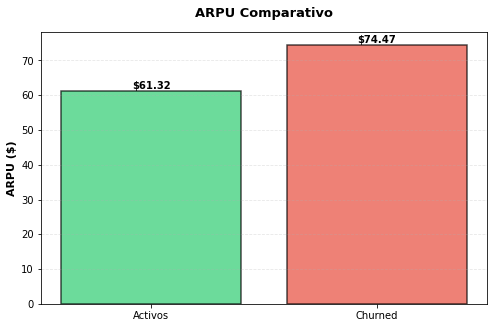

In [12]:
# Gráfico 7: Comparativa ARPU
plt.figure(figsize=(8, 5))
categories = ['Activos', 'Churned']
arpu_values = [arpu_activos, arpu_churned]
colors_bar = [color_activos, color_churned]

bars = plt.bar(categories, arpu_values, color=colors_bar, alpha=0.7,
              edgecolor='black', linewidth=1.5)

plt.ylabel('ARPU ($)', fontweight='bold', fontsize=11)
plt.title('ARPU Comparativo', fontweight='bold', fontsize=13, pad=15)
plt.grid(axis='y', alpha=0.3, linestyle='--')

for bar, val in zip(bars, arpu_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'${val:.2f}',
            ha='center', va='bottom', fontweight='bold', fontsize=10)


In [13]:
if arpu_churned > arpu_activos:
    print("   ⚠️  Los clientes que se van tienen MAYOR ARPU → Perdiendo clientes valiosos")
else:
    print("   ✅ Los clientes activos tienen MAYOR ARPU → Reteniendo a los mejores")


   ⚠️  Los clientes que se van tienen MAYOR ARPU → Perdiendo clientes valiosos


## 3.3 CLTV


In [14]:

# 5. CLTV PROMEDIO
cltv_promedio = df['cltv'].mean()
cltv_activos = df[df['churn_value'] == 0]['cltv'].mean()
cltv_churned = df[df['churn_value'] == 1]['cltv'].mean()

print(f"CLTV Promedio: ${cltv_promedio:.2f}")
print(f"CLTV Promedio de Clientes Activos: ${cltv_activos:.2f}")
print(f"CLTV Promedio de Clientes Perdidos: ${cltv_churned:.2f}")

CLTV Promedio: $4400.69
CLTV Promedio de Clientes Activos: $4491.44
CLTV Promedio de Clientes Perdidos: $4149.23


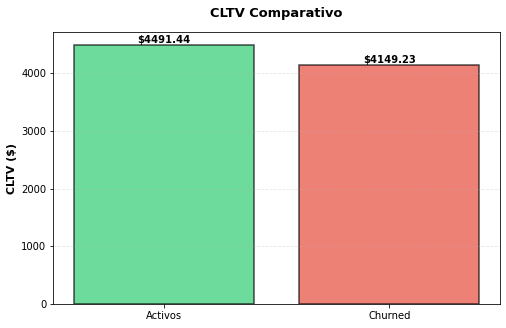

In [15]:
# Gráfico 7: Comparativa ARPU
plt.figure(figsize=(8, 5))
categories = ['Activos', 'Churned']
cltv_values = [cltv_activos, cltv_churned]
colors_bar = [color_activos, color_churned]

bars = plt.bar(categories, cltv_values, color=colors_bar, alpha=0.7,
              edgecolor='black', linewidth=1.5)

plt.ylabel('CLTV ($)', fontweight='bold', fontsize=11)
plt.title('CLTV Comparativo', fontweight='bold', fontsize=13, pad=15)
plt.grid(axis='y', alpha=0.3, linestyle='--')

for bar, val in zip(bars, cltv_values):         
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'${val:.2f}',
            ha='center', va='bottom', fontweight='bold', fontsize=10)


In [16]:

if cltv_churned > cltv_activos:
    print("   🚨 Los clientes churned tienen MAYOR CLTV → CRÍTICO: Perdiendo alto valor")
else:
    print("   ✅ Los clientes activos tienen MAYOR CLTV → Retención efectiva")


   ✅ Los clientes activos tienen MAYOR CLTV → Retención efectiva


## 3.4 Franjas de edad

In [17]:

# 6. CLIENTES SENIOR CITIZEN
senior_citizens = len(df[df['senior_citizen'] == 'Yes'])
pct_senior = (senior_citizens / total_clientes) * 100

print(f"Total de Clientes Senior Citizen: {senior_citizens} ({pct_senior:.2f}%)")

Total de Clientes Senior Citizen: 1135 (16.14%)


## 3.5 Tipologia de contrato

In [18]:
# 7. DISTRIBUCIÓN POR CONTRATO
distribucion_contrato = df['contract'].value_counts()
## porcentaje de cada tipo de contrato 
pct_contrato = (df['contract'].value_counts(normalize=True)*100).round(2)

print("Distribución por Contrato:")
print(distribucion_contrato)
print("\nPorcentaje por Contrato:")
print(pct_contrato)

Distribución por Contrato:
contract
Month-to-month    3834
Two year          1684
One year          1456
Name: count, dtype: int64

Porcentaje por Contrato:
contract
Month-to-month    54.98
Two year          24.15
One year          20.88
Name: proportion, dtype: float64


In [19]:
for contrato in ['Month-to-month', 'One year', 'Two year']:
    if contrato in distribucion_contrato.index:
        count = distribucion_contrato[contrato]
        pct = pct_contrato[contrato]
        bar_length = int(pct / 2)
        bar = '█' * bar_length
        print(f"│  {contrato:20s} {count:>6,} ({pct:>5.1f}%)  {bar:<50s}│")

│  Month-to-month        3,834 ( 55.0%)  ███████████████████████████                       │
│  One year              1,456 ( 20.9%)  ██████████                                        │
│  Two year              1,684 ( 24.1%)  ████████████                                      │


In [20]:
churn_by_contract = df.groupby('contract')['churn_value'].mean() * 100
#churn_by_contract = churn_by_contract.sort_values(ascending=True)
churn_by_contract

contract
Month-to-month    42.775170
One year          11.195055
Two year           2.850356
Name: churn_value, dtype: float64

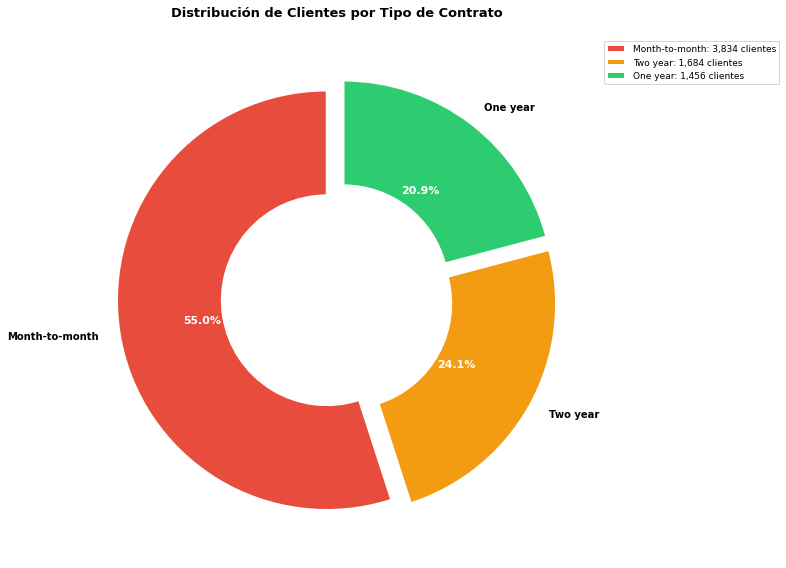

In [21]:
# Gráfico de Distribución por Contrato (Donut) - Independiente
plt.figure(figsize=(10, 8))

colors_donut = ['#e74c3c', '#f39c12', '#2ecc71']
explode = (0.05, 0.05, 0.05)

wedges, texts, autotexts = plt.pie(distribucion_contrato.values, 
                                    labels=distribucion_contrato.index,
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    colors=colors_donut,
                                    explode=explode,
                                    wedgeprops=dict(width=0.5, edgecolor='white', linewidth=2))

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

for text in texts:
    text.set_fontsize(10)
    text.set_fontweight('bold')

plt.title('Distribución de Clientes por Tipo de Contrato',
          fontweight='bold', fontsize=13, pad=20)

# Añadir leyenda con números
legend_labels = [f'{contrato}: {count:,} clientes' 
                 for contrato, count in zip(distribucion_contrato.index, distribucion_contrato.values)]
plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize=9)

plt.tight_layout()
plt.show()

## 3.6 Tiempo de permanencia de clientes

In [22]:
# 8. TENURE PROMEDIO ( meses de permanencia de los clientes)
tenure_promedio = df['tenure_months'].mean()
tenure_activos = df[df['churn_value'] == 0]['tenure_months'].mean()
tenure_churned = df[df['churn_value'] == 1]['tenure_months'].mean()


print(f"TENURE PROMEDIO: {tenure_promedio:.2f} meses")
print(f"TENURE PROMEDIO ACTIVOS: {tenure_activos:.2f} meses")
print(f"TENURE PROMEDIO CHURNED: {tenure_churned:.2f} meses")

TENURE PROMEDIO: 32.38 meses
TENURE PROMEDIO ACTIVOS: 37.57 meses
TENURE PROMEDIO CHURNED: 17.99 meses


In [23]:
print("\n💡 INSIGHTS:")

if tenure_churned < 12:
    print(f"   ⚠️  Tenure churned muy bajo ({tenure_churned:.1f} meses) → Problema de onboarding")
else:
    print(f"   ✅ Tenure churned alto ({tenure_churned:.1f} meses) → Buen mantenimiento")



💡 INSIGHTS:
   ✅ Tenure churned alto (18.0 meses) → Buen mantenimiento


In [24]:

# Crear bins de tenure para análisis temporal
tenure_bins = pd.cut(df['tenure_months'], bins=range(0, int(df['tenure_months'].max()) + 6, 6)) #recuerda que los rangos pueden definirse siguiendola siguiente estructura range(start, stop, step)
churn_by_tenure = df.groupby(tenure_bins)['churn_value'].agg(['mean', 'count'])

churn_by_tenure['churn_rate'] = churn_by_tenure['mean'] * 100


churn_by_tenure[['count', 'churn_rate']].rename(columns={'count': 'Numero_Clientes', 'churn_rate': 'Churn_Rate_%'})

,Numero_Clientes,Churn_Rate_%
tenure_months,,
"(0, 6]",1468,53.337875
"(6, 12]",702,35.612536
"(12, 18]",546,32.417582
"(18, 24]",477,24.737945
"(24, 30]",431,21.809745
"(30, 36]",400,21.250000
"(36, 42]",379,21.899736
"(42, 48]",382,16.230366
"(48, 54]",420,16.190476


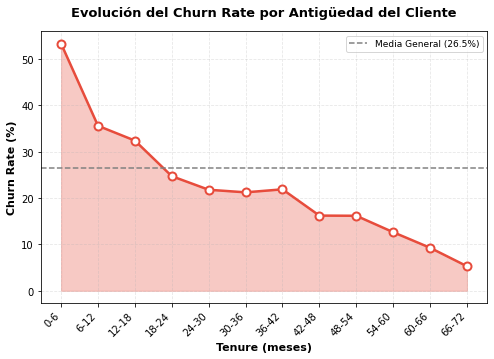

In [25]:
color_churned = '#e74c3c'

# Create a standalone figure instead of a subplot
fig, ax = plt.subplots(figsize=(8, 5))

x_labels = [f'{int(i.left)}-{int(i.right)}' for i in churn_by_tenure.index] 
x_pos = range(len(x_labels))

ax.plot(x_pos, churn_by_tenure['churn_rate'].values, marker='o', linewidth=2.5,
        markersize=8, color=color_churned, markerfacecolor='white', 
        markeredgewidth=2, markeredgecolor=color_churned)


ax.fill_between(x_pos, churn_by_tenure['churn_rate'].values, alpha=0.3, color=color_churned)

ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_xlabel('Tenure (meses)', fontweight='bold', fontsize=11)
ax.set_ylabel('Churn Rate (%)', fontweight='bold', fontsize=11)
ax.set_title('Evolución del Churn Rate por Antigüedad del Cliente', 
             fontweight='bold', fontsize=13, pad=15)
ax.grid(alpha=0.3, linestyle='--')
ax.axhline(y=churn_rate, color='gray', linestyle='--', label=f'Media General ({churn_rate:.1f}%)')
ax.legend(loc='best', fontsize=9)

fig.show();


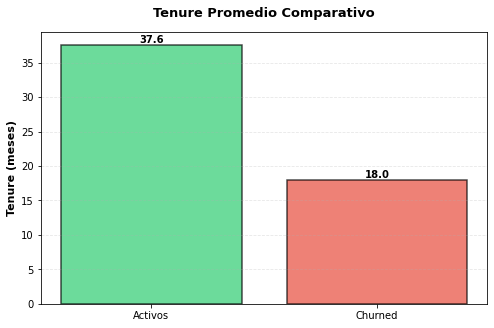

In [26]:
#Gráfico 7: Comparativa Tenure Promedio
plt.figure(figsize=(8, 5))

categories = ['Activos', 'Churned']
tenure_values = [tenure_activos, tenure_churned]
colors_bar = [color_activos, color_churned]

bars = plt.bar(categories, tenure_values, color=colors_bar, alpha=0.7,
              edgecolor='black', linewidth=1.5)

plt.ylabel('Tenure (meses)', fontweight='bold', fontsize=11)
plt.title('Tenure Promedio Comparativo', fontweight='bold', fontsize=13, pad=15)
plt.grid(axis='y', alpha=0.3, linestyle='--')

for bar, val in zip(bars, tenure_values):         
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.1f}',       
            ha='center', va='bottom', fontweight='bold', fontsize=10)


- Vemos como en los primeros 6 meses con un churn rate de 53,37% , parece indicar un posible problema de onboarding o insatisfacción inicial.

- Por el contrario los clientes con mas de 66 meses de tenure tienen un churn rate de 5,3% , lo cual indica que son muy leales y tienen un buen compromiso con la empresa.


In [27]:
if churn_by_tenure['churn_rate'].iloc[0] > 40:
    print("   🚨 CRÍTICO: Churn muy alto en primeros 6 meses → Problema de onboarding")
else:
    print("   ✅ Positivo: Churn bajo en primeros 6 meses → Buen inicio")
    
if churn_by_tenure['churn_rate'].iloc[-1] < 10:
    print("   ✅ Positivo: Clientes con mayor tenure son muy leales → Buen compromiso(menos del 10% de churn)")
else:
    print("   🚨 CRÍTICO: Alta rotación de clientes con mayor tenure → Riesgo de perdida de leales clientes")


   🚨 CRÍTICO: Churn muy alto en primeros 6 meses → Problema de onboarding
   ✅ Positivo: Clientes con mayor tenure son muy leales → Buen compromiso(menos del 10% de churn)


> ## Recap

In [28]:
# ====================================================================
# ANÁLISIS COMPARATIVO
# ====================================================================

print("\n" + "="*90)
print("🔍 ANÁLISIS COMPARATIVO: ACTIVOS vs CHURNED")
print("="*90)

comparativa = pd.DataFrame({'Métrica': ['ARPU ($)', 'CLTV ($)', 'Tenure (meses)'],
                            'Activos': [arpu_activos, cltv_activos, tenure_activos],
                            'Churned': [arpu_churned, cltv_churned, tenure_churned],
                            })

comparativa['Diferencia'] = comparativa['Activos'] - comparativa['Churned']
comparativa['% Diferencia'] = ((comparativa['Activos'] / comparativa['Churned'] - 1) * 100).round(2)
comparativa




🔍 ANÁLISIS COMPARATIVO: ACTIVOS vs CHURNED


,Métrica,Activos,Churned,Diferencia,% Diferencia
0,ARPU ($),61.320637,74.473700,-13.153063,-17.66
1,CLTV ($),4491.438661,4149.228418,342.210243,8.25
2,Tenure (meses),37.573142,17.994638,19.578504,108.80


# 4. Análisis de Churn

En este apartado necesitamos entender causas y segmentación de cancelaciones.


In [51]:
# Separar datasets
churned = df[df['churn_value'] == 1].copy()
activos = df[df['churn_value'] == 0].copy()



## 4.1 Tasa de Churn por segmento:
>### Churn por género.

In [53]:

# 1. CHURN RATE POR GÉNERO
print("\n" + "="*90)
print("👥 1. CHURN RATE POR GÉNERO")
print("-"*90)

churn_by_gender = df.groupby('gender').agg({
    'churn_value': ['sum', 'mean', 'count']
}).round(4)
churn_by_gender.columns = ['Total_Churned', 'Churn_Rate', 'Total_Clientes']
churn_by_gender['Churn_Rate'] = churn_by_gender['Churn_Rate'] * 100
churn_by_gender['Retention_Rate'] = 100 - churn_by_gender['Churn_Rate']

churn_by_gender


👥 1. CHURN RATE POR GÉNERO
------------------------------------------------------------------------------------------


,Total_Churned,Churn_Rate,Total_Clientes,Retention_Rate
gender,,,,
Female,937.0,26.94,3478,73.06
Male,928.0,26.10,3555,73.90


In [29]:
df.groupby("churn_label")["gender"].value_counts(normalize=True)

churn_label  gender
No           Male      0.508320
             Female    0.491680
Yes          Female    0.502413
             Male      0.497587
Name: proportion, dtype: float64

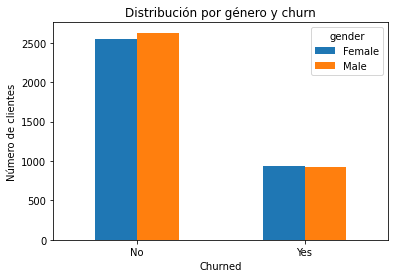

In [31]:
# generamos una grafica para ver la distribución por género y churn con un grouped barplot
df.groupby("churn_label")["gender"].value_counts().unstack().plot(kind="bar")
plt.title("Distribución por género y churn")
plt.xlabel("Churned")
plt.xticks(rotation=0)
plt.ylabel("Número de clientes")
plt.show()

In [32]:
df[df["churn_label"] =="Yes"]["gender"].value_counts(normalize=True) 


gender
Female    0.502413
Male      0.497587
Name: proportion, dtype: float64

>### Churn por franjas de edad.

In [33]:
df.groupby("churn_label")["senior_citizen"].value_counts(normalize=True)

churn_label  senior_citizen
No           No                0.870698
             Yes               0.129302
Yes          No                0.746494
             Yes               0.253506
Name: proportion, dtype: float64

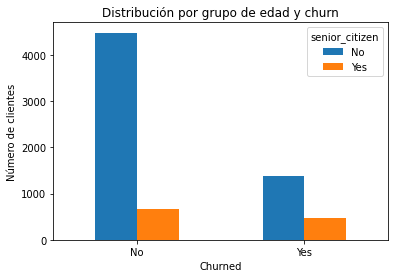

In [34]:
df.groupby("churn_label")["senior_citizen"].value_counts().unstack().plot(kind="bar")
plt.title("Distribución por grupo de edad y churn")
plt.xticks(rotation=0)
plt.xlabel("Churned")
plt.ylabel("Número de clientes")
plt.show()

In [35]:
df[df["churn_label"] =="Yes"]["senior_citizen"].value_counts(normalize=True) 


senior_citizen
No     0.746494
Yes    0.253506
Name: proportion, dtype: float64

>### Churn por tipo contrato.

In [36]:
df.groupby("churn_label")["contract"].value_counts(normalize=True)

churn_label  contract      
No           Month-to-month    0.428265
             Two year          0.319344
             One year          0.252391
Yes          Month-to-month    0.886008
             One year          0.088061
             Two year          0.025932
Name: proportion, dtype: float64

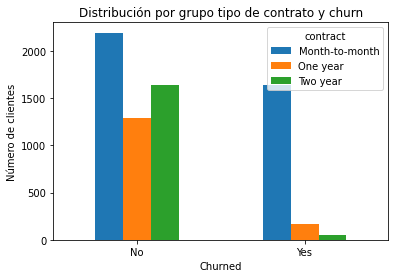

In [37]:
df.groupby("churn_label")["contract"].value_counts().unstack().plot(kind="bar")
plt.title("Distribución por grupo tipo de contrato y churn")
plt.xticks(rotation=0)
plt.xlabel("Churned")
plt.ylabel("Número de clientes")
plt.show()

In [38]:
df[df["churn_label"] =="Yes"]["contract"].value_counts(normalize=True) 


contract
Month-to-month    0.886008
One year          0.088061
Two year          0.025932
Name: proportion, dtype: float64

>### Churn por tipo de servicio.

In [39]:
df.groupby("churn_label")["internet_service"].value_counts(normalize=True)


churn_label  internet_service
No           DSL                 0.378982
             Fiber optic         0.347514
             No                  0.273504
Yes          Fiber optic         0.693921
             DSL                 0.245831
             No                  0.060247
Name: proportion, dtype: float64

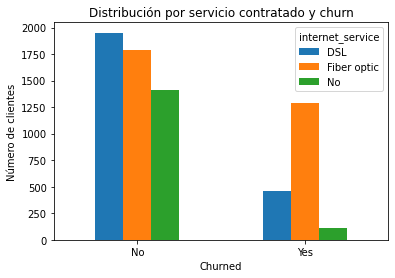

In [40]:
df.groupby("churn_label")["internet_service"].value_counts().unstack().plot(kind="bar")
plt.title("Distribución por servicio contratado y churn")
plt.xticks([0, 1],rotation=0)
plt.xlabel("Churned")
plt.ylabel("Número de clientes")
plt.show()

## 4.2. Razones de Churn.


>### Top Razones de Churn.

In [41]:
df["churn_reason"].value_counts(normalize = True)[:5]

churn_reason
Attitude of support person                   0.104065
Competitor offered higher download speeds    0.099729
Competitor offered more data                 0.087263
Don't know                                   0.082385
Competitor made better offer                 0.075339
Name: proportion, dtype: float64

In [42]:
dict_churn_reason = df["churn_reason"].value_counts().to_dict()
dict_churn_reason

{'Attitude of support person': 192,
 'Competitor offered higher download speeds': 184,
 'Competitor offered more data': 161,
 "Don't know": 152,
 'Competitor made better offer': 139,
 'Attitude of service provider': 134,
 'Competitor had better devices': 125,
 'Product dissatisfaction': 102,
 'Network reliability': 102,
 'Price too high': 96,
 'Service dissatisfaction': 87,
 'Lack of self-service on Website': 87,
 'Extra data charges': 57,
 'Moved': 53,
 'Lack of affordable download/upload speed': 44,
 'Long distance charges': 43,
 'Limited range of services': 42,
 'Poor expertise of phone support': 20,
 'Poor expertise of online support': 19,
 'Deceased': 6}

In [43]:
# Crear la nube de palabras con frecuencias
nube = WordCloud(width=1200,
                height=600,
                background_color='white',
                colormap='RdYlBu_r',  # Rojo para frecuencias altas, azul para bajas
                relative_scaling=0.5,
                min_font_size=10,
                max_words=100,
                collocations=False  # Evitar repeticiones
                ).generate_from_frequencies(dict_churn_reason)


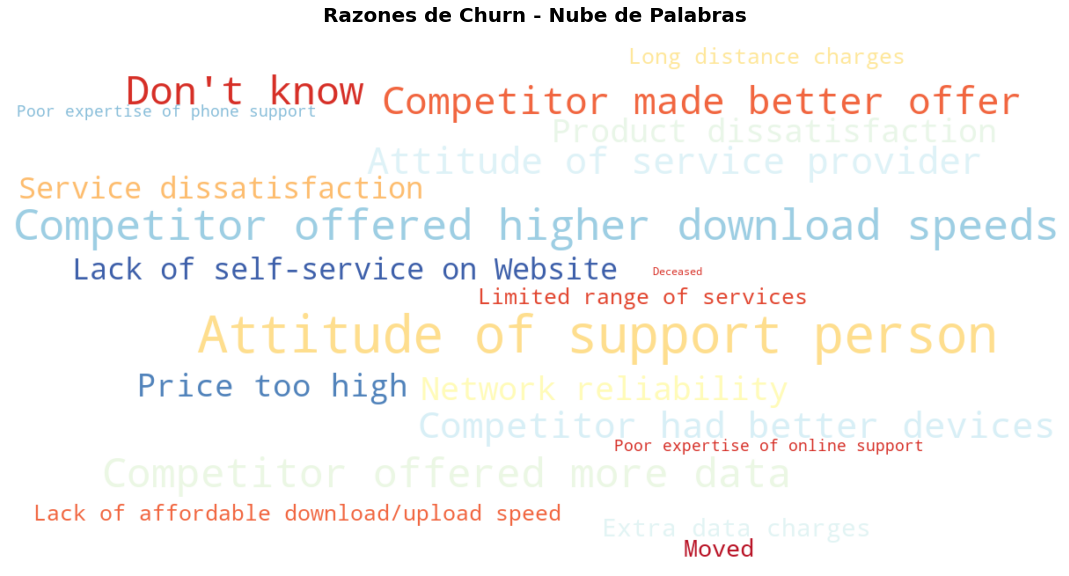

In [44]:
# Mostrar la nube de palabras
plt.figure(figsize=(15, 8))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.title('Razones de Churn - Nube de Palabras', fontsize=20, pad=20, weight='bold')
plt.tight_layout()
plt.show()

## 4.3. Churn por metodo de pago.

In [45]:
df.groupby("churn_label")["payment_method"].value_counts(normalize=True)


churn_label  payment_method           
No           Mailed check                 0.251839
             Electronic check             0.250097
             Credit card (automatic)      0.249322
             Bank transfer (automatic)    0.248742
Yes          Electronic check             0.573498
             Mailed check                 0.164700
             Bank transfer (automatic)    0.137876
             Credit card (automatic)      0.123927
Name: proportion, dtype: float64

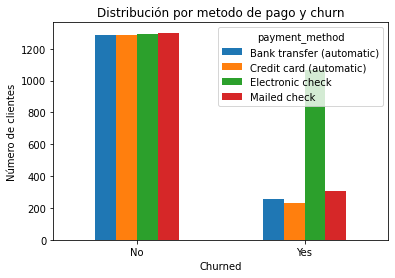

In [46]:
df.groupby("churn_label")["payment_method"].value_counts().unstack().plot(kind="bar")
plt.title("Distribución por metodo de pago y churn")
plt.xticks([0, 1],rotation=0)
plt.xlabel("Churned")
plt.ylabel("Número de clientes")
plt.show()

In [47]:
df[df["churn_label"] =="Yes"]["payment_method"].value_counts(normalize=True) 


payment_method
Electronic check             0.573498
Mailed check                 0.164700
Bank transfer (automatic)    0.137876
Credit card (automatic)      0.123927
Name: proportion, dtype: float64

## 4.4. Churn Score medio por cliente.

In [48]:
df.groupby("churn_label")["churn_score"].mean()


churn_label
No     50.096246
Yes    82.486113
Name: churn_score, dtype: float64

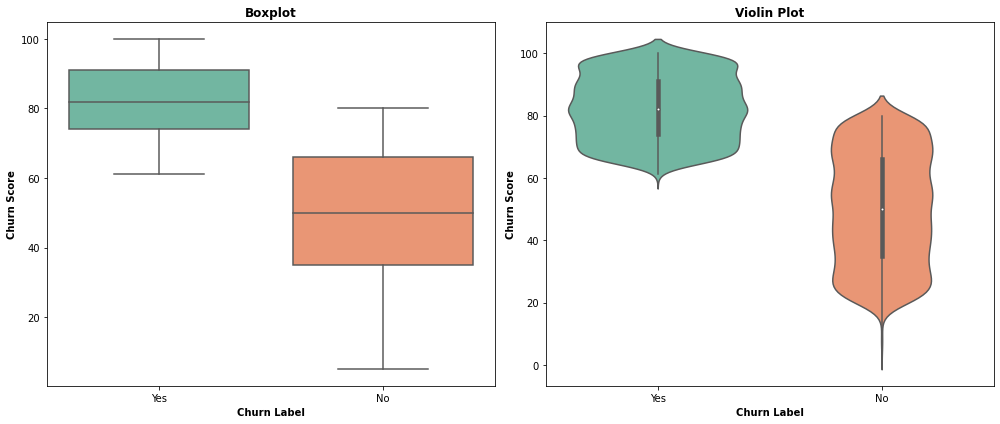

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot
sns.boxplot(data=df, 
            x='churn_label', 
            y='churn_score', 
            palette='Set2', 
            ax=axes[0])
axes[0].set_title('Boxplot', fontweight='bold')
axes[0].set_xlabel('Churn Label', fontweight='bold')
axes[0].set_ylabel('Churn Score', fontweight='bold')

# Violin plot para ver mejor la distribución
sns.violinplot(data=df, 
               x='churn_label', 
               y='churn_score', 
               palette='Set2', 
               ax=axes[1])  
axes[1].set_title('Violin Plot', fontweight='bold')
axes[1].set_xlabel('Churn Label', fontweight='bold')
axes[1].set_ylabel('Churn Score', fontweight='bold')

plt.tight_layout()
plt.show()

## 4.5. Churn por tipo segmentacion de cliente segun cltv.

In [50]:
df.groupby("churn_label")["cltv_segment"].value_counts(normalize=True)


KeyError: 'Column not found: cltv_segment'

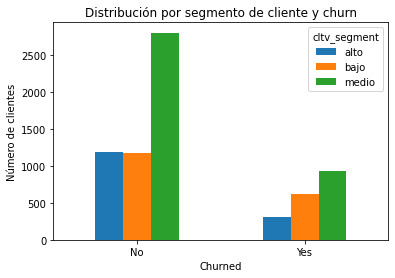

In [ ]:
df.groupby("churn_label")["cltv_segment"].value_counts().unstack().plot(kind="bar")
plt.title("Distribución por segmento de cliente y churn")
plt.xticks(rotation=0)
plt.xlabel("Churned")
plt.ylabel("Número de clientes")
plt.show()

> ### Churn por tipo de contrato y método de pago.

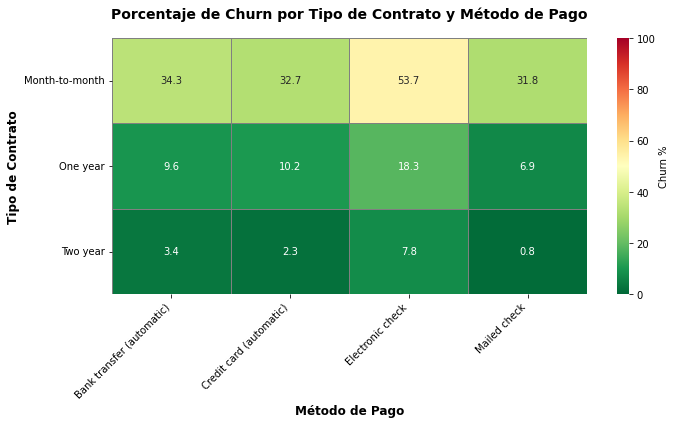

In [ ]:
#heatmap churn % por tipo de contrato y método de pago.
# Calcular el porcentaje de churn por tipo de contrato y método de pago
churn_pivot = df.groupby(['contract', 'payment_method'])['churn_label'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100 if isinstance(x.iloc[0], str) else x.sum() / len(x) * 100).reset_index()

# Crear tabla pivote para el heatmap
heatmap_data = churn_pivot.pivot(index='contract', columns='payment_method', values='churn_label')

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data,
            annot=True,  # Mostrar valores
            fmt='.1f',   # Formato con 1 decimal
            cmap='RdYlGn_r',  # Rojo = alto churn, Verde = bajo churn
            cbar_kws={'label': 'Churn %'},
            linewidths=0.5,
            linecolor='gray',
            vmin=0,
            vmax=100)

plt.title('Porcentaje de Churn por Tipo de Contrato y Método de Pago', fontsize=14, weight='bold', pad=20)
plt.xlabel('Método de Pago', fontsize=12, weight='bold')
plt.ylabel('Tipo de Contrato', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



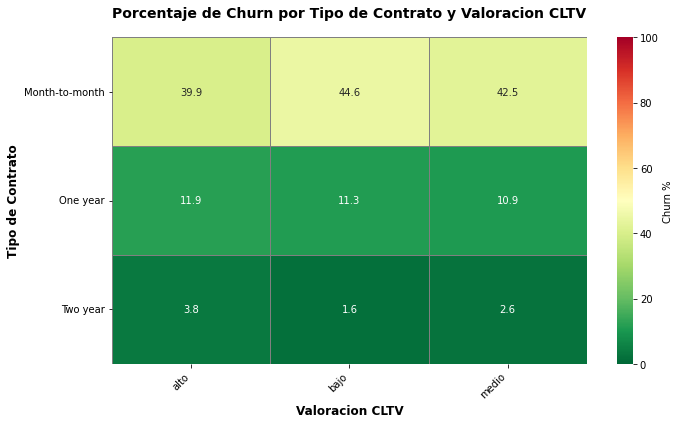

In [ ]:
#heatmap churn % por tipo de contrato y método de pago.
# Calcular el porcentaje de churn por tipo de contrato y método de pago
churn_pivot = df.groupby(['contract', 'cltv_segment'])['churn_label'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100 if isinstance(x.iloc[0], str) else x.sum() / len(x) * 100).reset_index()


# Crear tabla pivote para el heatmap
heatmap_data = churn_pivot.pivot(index='contract', columns='cltv_segment', values='churn_label')

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data,
            annot=True,  # Mostrar valores
            fmt='.1f',   # Formato con 1 decimal
            cmap='RdYlGn_r',  # Rojo = alto churn, Verde = bajo churn
            cbar_kws={'label': 'Churn %'},
            linewidths=0.5,
            linecolor='gray',
            vmin=0,
            vmax=100)


plt.title('Porcentaje de Churn por Tipo de Contrato y Valoracion CLTV', fontsize=14, weight='bold', pad=20)
plt.xlabel('Valoracion CLTV', fontsize=12, weight='bold')
plt.ylabel('Tipo de Contrato', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



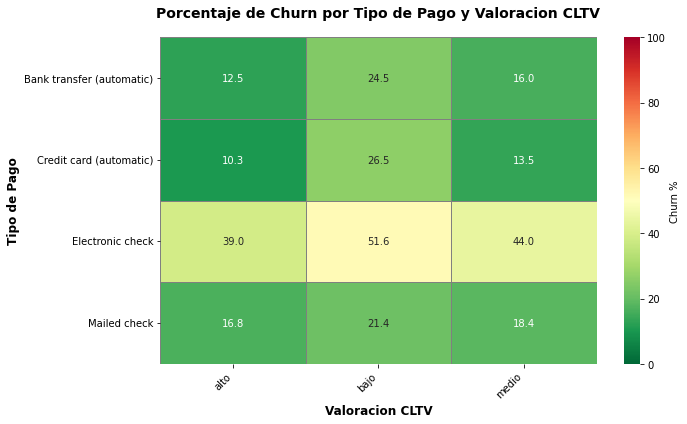

In [ ]:
#heatmap churn % por tipo de contrato y método de pago.
# Calcular el porcentaje de churn por tipo de contrato y método de pago
churn_pivot = df.groupby(['payment_method', 'cltv_segment'])['churn_label'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100 if isinstance(x.iloc[0], str) else x.sum() / len(x) * 100).reset_index()


# Crear tabla pivote para el heatmap
heatmap_data = churn_pivot.pivot(index='payment_method', columns='cltv_segment', values='churn_label')

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data,
            annot=True,  # Mostrar valores
            fmt='.1f',   # Formato con 1 decimal
            cmap='RdYlGn_r',  # Rojo = alto churn, Verde = bajo churn
            cbar_kws={'label': 'Churn %'},
            linewidths=0.5,
            linecolor='gray',
            vmin=0,
            vmax=100)

plt.title('Porcentaje de Churn por Tipo de Pago y Valoracion CLTV', fontsize=14, weight='bold', pad=20)
plt.xlabel('Valoracion CLTV', fontsize=12, weight='bold')
plt.ylabel('Tipo de Pago', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



# 5. Perfilado Demográfico y Geográfico

En este apartado necesitamos identificar patrones de cancelación y valor según perfil del cliente.

##  5.1. Composicion de clientes

In [ ]:
col_demograficas = ['gender','senior_citizen', 'partner', 'dependents']
df_demografico = pd.DataFrame(df[col_demograficas].value_counts(normalize=True)).reset_index()
df_demografico.columns = col_demograficas + ['proporcion_clientes']
df_demografico["grupo_demografico"] = df_demografico[col_demograficas].apply(lambda x: "_".join(x), axis=1)
df_demografico.set_index("grupo_demografico", inplace=True)

df_demografico.reset_index(inplace=True)
df_demografico



,grupo_demografico,gender,senior_citizen,partner,dependents,proporcion_clientes
0,Male_No_No_No,Male,No,No,No,0.202205
1,Female_No_No_No,Female,No,No,No,0.193066
2,Female_No_Yes_No,Female,No,Yes,No,0.113142
3,Male_No_Yes_No,Male,No,Yes,No,0.107485
4,Female_No_Yes_Yes,Female,No,Yes,Yes,0.091239
5,Male_No_Yes_Yes,Male,No,Yes,Yes,0.089063
6,Female_Yes_No_No,Female,Yes,No,No,0.044531
7,Male_Yes_Yes_No,Male,Yes,Yes,No,0.042356
8,Male_Yes_No_No,Male,Yes,No,No,0.034668
9,Female_Yes_Yes_No,Female,Yes,Yes,No,0.030606


##  5.2.Composicion de clientes churn

In [ ]:
df_churn_demografico = df[df["churn_label"] == "Yes"][col_demograficas].value_counts(normalize=True).reset_index()
df_churn_demografico.columns = col_demograficas + ['proporcion_churn']
df_churn_demografico["grupo_demografico"] = df_churn_demografico[col_demograficas].apply(lambda x: "_".join(x), axis=1)
df_churn_demografico.set_index("grupo_demografico", inplace=True)
df_churn_demografico = df_churn_demografico["proporcion_churn"]
df_churn_demografico



grupo_demografico
Male_No_No_No         0.235844
Female_No_No_No       0.234744
Male_No_Yes_No        0.113799
Female_No_Yes_No      0.109951
Female_Yes_No_No      0.083013
Male_Yes_No_No        0.063222
Male_Yes_Yes_No       0.061572
Female_Yes_Yes_No     0.041781
Female_No_Yes_Yes     0.015393
Female_No_No_Yes      0.012095
Male_No_No_Yes        0.012095
Male_No_Yes_Yes       0.010995
Female_Yes_No_Yes     0.002199
Female_Yes_Yes_Yes    0.002199
Male_Yes_No_Yes       0.000550
Male_Yes_Yes_Yes      0.000550
Name: proporcion_churn, dtype: float64

> Recap perfil de clientes

In [ ]:
col_demograficas = ['gender','senior_citizen', 'partner', 'dependents']
df_demografico = pd.DataFrame(df[col_demograficas].value_counts(normalize=True)).reset_index()
df_demografico.columns = col_demograficas + ['proporcion_clientes']
df_demografico["grupo_demografico"] = df_demografico[col_demograficas].apply(lambda x: "_".join(x), axis=1)
df_demografico.set_index("grupo_demografico", inplace=True)

df_demografico = df_demografico.join(df_churn_demografico)


df_demografico.reset_index(inplace=True)
df_demografico


,grupo_demografico,gender,senior_citizen,partner,dependents,proporcion_clientes,proporcion_churn
0,Male_No_No_No,Male,No,No,No,0.202205,0.235844
1,Female_No_No_No,Female,No,No,No,0.193066,0.234744
2,Female_No_Yes_No,Female,No,Yes,No,0.113142,0.109951
3,Male_No_Yes_No,Male,No,Yes,No,0.107485,0.113799
4,Female_No_Yes_Yes,Female,No,Yes,Yes,0.091239,0.015393
5,Male_No_Yes_Yes,Male,No,Yes,Yes,0.089063,0.010995
6,Female_Yes_No_No,Female,Yes,No,No,0.044531,0.083013
7,Male_Yes_Yes_No,Male,Yes,Yes,No,0.042356,0.061572
8,Male_Yes_No_No,Male,Yes,No,No,0.034668,0.063222
9,Female_Yes_Yes_No,Female,Yes,Yes,No,0.030606,0.041781


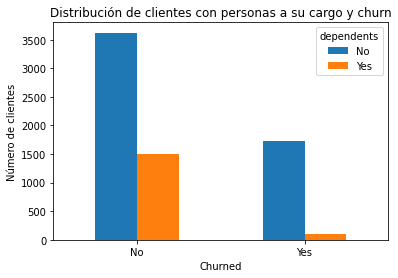

In [ ]:
df.groupby("churn_label")["dependents"].value_counts().unstack().plot(kind="bar")
plt.title("Distribución de clientes con personas a su cargo y churn")
plt.xticks(rotation=0)
plt.xlabel("Churned")
plt.ylabel("Número de clientes")
plt.show()

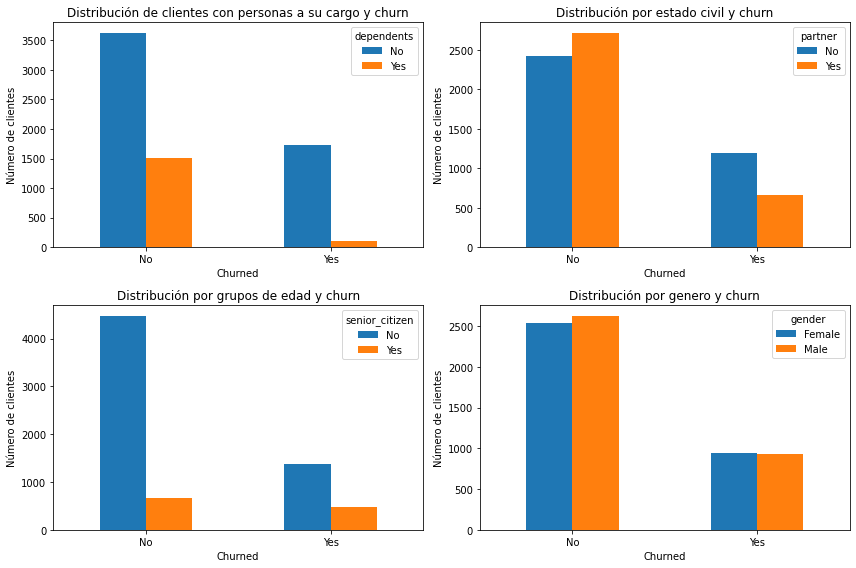

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

plots = [("dependents", "Distribución de clientes con personas a su cargo y churn"),
        ("partner", "Distribución por estado civil y churn"),
        ("senior_citizen", "Distribución por grupos de edad y churn"),
        ("gender", "Distribución por genero y churn")]


for ax, (col, title) in zip(axes, plots):
    df.groupby("churn_label")[col].value_counts().unstack().plot(kind="bar", ax=ax)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_xlabel("Churned")
    ax.set_ylabel("Número de clientes")

plt.tight_layout()
plt.show()

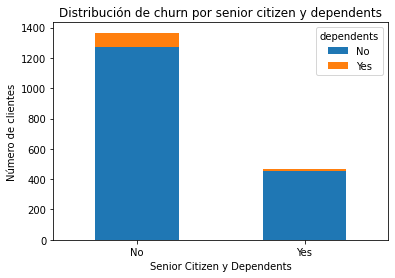

In [ ]:
# hacer un stacked bar plot  de churn == "yes"  por senior y dependents 
df[df["churn_label"] == "Yes"].groupby(["senior_citizen", "dependents"]).size().unstack().plot(kind="bar", stacked=True)
plt.title("Distribución de churn por senior citizen y dependents")
plt.xticks(rotation=0)
plt.xlabel("Senior Citizen y Dependents")
plt.ylabel("Número de clientes")
plt.show()

## 5.3.Ciudades con más clientes y con más churn.

In [ ]:
# ciudades con mas clientes
serie_top10_customer = df["city"].value_counts(normalize=True)[:10]
serie_top10_customer

city
Los Angeles      0.043472
San Diego        0.021380
San Jose         0.015821
Sacramento       0.015393
San Francisco    0.014538
Fresno           0.008979
Long Beach       0.008552
Oakland          0.007269
Stockton         0.006271
Glendale         0.005701
Name: proportion, dtype: float64

In [ ]:

# ciudades con mas churn 
serie_top10_customer_churn = df[df["churn_label"] == "Yes"]["city"].value_counts(normalize=True)[:10]
serie_top10_customer_churn


city
Los Angeles      0.048361
San Diego        0.026867
San Francisco    0.016120
San Jose         0.015583
Sacramento       0.013971
Fresno           0.008060
Long Beach       0.008060
Glendale         0.006985
Oakland          0.006985
Stockton         0.006448
Name: proportion, dtype: float64

In [ ]:
# tienen las mismas ciudades 
serie_top10_customer.index.sort_values() == serie_top10_customer_churn.index.sort_values()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
# generamos un df con todos los datos de las ciudades en serie_top10_customer.index
df_top10_customer = df[df["city"].isin(serie_top10_customer.index)]
df_top10_customer.head()


,index,city,zip_code,lat_long,latitude,longitude,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,total_charges,churn_label,churn_value,cltv,churn_reason,tenure_months,monthly_charges,churn_score,cltv_segment
0,0,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes,1.0,3239.0,Competitor made better offer,2.0,53.85,86.0,bajo
1,1,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes,1.0,2701.0,Moved,2.0,70.70,67.0,bajo
2,2,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,820.5,Yes,1.0,5372.0,Moved,8.0,99.65,86.0,medio
3,3,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,3046.05,Yes,1.0,5003.0,Moved,28.0,104.80,84.0,medio
4,4,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,Male,NaN,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),5036.3,Yes,1.0,5340.0,Competitor had better devices,49.0,103.70,89.0,medio


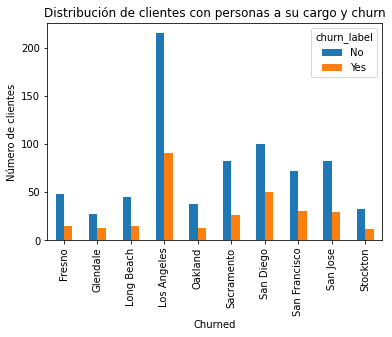

In [ ]:
df_top10_customer.groupby("city")["churn_label"].value_counts().unstack().plot(kind="bar")
plt.title("Distribución de clientes con personas a su cargo y churn")
plt.xticks(rotation=90)
plt.xlabel("Churned")
plt.ylabel("Número de clientes")
plt.show()

In [ ]:
# df[""zip_code""] lo pasamos a int
df["zip_code"] = df["zip_code"].astype(int)
df_gr = df.groupby(["zip_code","city", 'latitude', 'longitude']).agg({'churn_value':'count'}).reset_index()

# Crear el mapa
m = folium.Map(location=[33.973616, -118.249020], zoom_start=10)

# Añadir capa de calor con pesos
HeatMap( name="Mapa calor clientes",
        data=df_gr[['latitude', 'longitude', 'churn_value']].values,
        radius=8,     # controla el tamaño del punto
        blur=10,       # suavizado
        color='red',
        max_zoom=8    # nivel de zoom máximo
        ).add_to(m)

folium.LayerControl().add_to(m)
m

In [ ]:
# creamos un mapa centrado en los anguilas
m_churn = folium.Map(location=[33.973616, -118.249020], zoom_start=10)

for _, row in df_top10_customer.iterrows():
    if row['churn_label'] == 'Yes':
        folium.CircleMarker( name="Churners",
            location=[row['latitude'], row['longitude']],
            radius=6,
            color= 'red',
            fill=True, #  
            popup=f"Zip: {row['zip_code']} - CLTV: {_,row['cltv_segment']}"
        ).add_to(m_churn)


m_churn

> Recap

In [ ]:
# Total de clientes por ubicación
df_clients = (df.groupby(["zip_code", "city", "latitude", "longitude"]).agg(total_clientes=("churn_value", "count")).reset_index())

# Total de churn por ubicación (asumiendo churn_value == 1 es abandono)
df_churn = (df[df["churn_value"] == 1].groupby(["zip_code", "city", "latitude", "longitude"]).agg(churners=("churn_value", "count")).reset_index())

# --- Mapa base ---
m = folium.Map(location=[33.973616, -118.249020], zoom_start=10, tiles="cartodbpositron")

# --- Heatmap de TODOS los clientes ---
HeatMap(name="Clientes totales",
        data=df_clients[["latitude", "longitude", "total_clientes"]].values,
        radius=10,
        blur=12,
        min_opacity=0.25,
        max_zoom=8).add_to(m)

# --- Marcadores para CHURN por ZIP ---
# Cluster (opcional, para agrupar marcadores cercanos)
mc = MarkerCluster(name="Churn por zip_code").add_to(m)

# Escala de radio en función del churn (evita división por cero si está vacío)
max_churn = df_churn["churners"].max() if not df_churn.empty else 1

for _, r in df_churn.iterrows():
    # Radio entre 6 y 16 px según intensidad de churn
    rad = 6 + 10 * (r["churners"] / max_churn)

    # Tooltip rápido y popup más detallado
    tooltip_txt = f"ZIP {r['zip_code']} · Churn: {r['churners']}"
    popup_html = (f"<b>ZIP:</b> {r['zip_code']}<br>"
                  f"<b>Ciudad:</b> {r['city']}<br>"
                  f"<b>Total churn:</b> {r['churners']}")


    folium.CircleMarker(location=[r["latitude"], r["longitude"]],
                        radius=rad,
                        color="#c40000",
                        fill=True,
                        fill_opacity=0.75,
                        weight=1,
                        tooltip=tooltip_txt,
                        popup=folium.Popup(popup_html, max_width=250)).add_to(mc)

folium.LayerControl().add_to(m)
m  

# guardar mapa
#m.save("mapa_churn.html")


# 6.Servicios Contratados & Uso.

En este apartado tendremos que analizar cómo los servicios afectan al churn y a ingresos.

In [ ]:
# Identificar columnas de servicios
service_cols = [ 'phone_service', 'multiple_lines', 'internet_service','online_security', 'online_backup', 'device_protection','tech_support', 'streaming_tv', 'streaming_movies']
# Tabla resumen detallada
summary_data = []
for service in service_cols:
    service_stats = df.groupby(service).agg({'churn_value': ['mean', 'sum', 'count']})
    service_stats.columns = ['Tasa_Churn', 'Total_Churns', 'Total_Clientes']
    service_stats['Servicio'] = service.replace('_', ' ').title()
    service_stats['Categoria'] = service_stats.index
    service_stats = service_stats.reset_index(drop=True)
    summary_data.append(service_stats)

summary_df = pd.concat(summary_data, ignore_index=True)
summary_df = summary_df[['Servicio', 'Categoria', 'Total_Clientes', 'Total_Churns','Tasa_Churn' ]]
summary_df['Tasa_Churn'] = summary_df['Tasa_Churn'].apply(lambda x: f"{x:.2%}")

summary_df

,Servicio,Categoria,Total_Clientes,Total_Churns,Tasa_Churn
0,Phone Service,No,681,169.0,24.82%
1,Phone Service,Yes,6336,1693.0,26.72%
2,Multiple Lines,No,3360,845.0,25.15%
3,Multiple Lines,No phone service,681,170.0,24.96%
4,Multiple Lines,Yes,2945,844.0,28.66%
5,Internet Service,DSL,2408,457.0,18.98%
6,Internet Service,Fiber optic,3079,1290.0,41.90%
7,Internet Service,No,1520,112.0,7.37%
8,Online Security,No,3494,1458.0,41.73%
9,Online Security,No internet service,1523,112.0,7.35%


In [ ]:
impact_analysis = []
for service in service_cols:
    churn_by_cat = df.groupby(service)['churn_value'].mean()
    if len(churn_by_cat) > 1:
        max_churn = churn_by_cat.max()
        min_churn = churn_by_cat.min()
        diff = max_churn - min_churn
        impact_analysis.append({'Servicio': service.replace('_', ' ').title(),
                                'Churn_Max': f"{max_churn:.2%}",
                                'Churn_Min': f"{min_churn:.2%}",
                                'Diferencia': f"{diff:.2%}",
                                'Impacto_Numerico': diff})

impact_df = pd.DataFrame(impact_analysis).sort_values('Impacto_Numerico', ascending=False)
#print(impact_df[['Servicio', 'Churn_Max', 'Churn_Min', 'Diferencia']].to_string(index=False))

impact_df


,Servicio,Churn_Max,Churn_Min,Diferencia,Impacto_Numerico
2,Internet Service,41.90%,7.37%,34.53%,0.345283
3,Online Security,41.73%,7.35%,34.37%,0.343748
6,Tech Support,41.60%,7.33%,34.26%,0.342649
4,Online Backup,39.92%,7.38%,32.54%,0.325373
5,Device Protection,39.12%,7.34%,31.78%,0.317793
8,Streaming Movies,33.56%,7.32%,26.24%,0.262410
7,Streaming Tv,33.48%,7.36%,26.12%,0.261172
1,Multiple Lines,28.66%,24.96%,3.70%,0.036955
0,Phone Service,26.72%,24.82%,1.90%,0.019039


# 7.Ingresos & Rentabilidad.

En este apartado tendremos que medir impacto económico del churn.

## 7.1 Impacto económico del churn

In [ ]:
# 1. INGRESOS PERDIDOS POR CHURN
churned_customers = df[df['churn_value'] == 1]
retained_customers = df[df['churn_value'] == 0]

ingresos_perdidos_mensuales = churned_customers['monthly_charges'].sum()
ingresos_perdidos_totales = churned_customers['total_charges'].sum()


print("\n💰 1. INGRESOS PERDIDOS POR CHURN")
print("-" * 80)
print(f"   monthly_charges totales producidos por clientes perdidos:    ${ingresos_perdidos_mensuales:,.2f}")
print(f"   total_charges totales producidos por clientes perdidos:      ${ingresos_perdidos_totales:,.2f}")
print(f"   Número de clientes perdidos:    {len(churned_customers):,}")
print(f"   monthly_charges promedio por cliente perdido: ${churned_customers['monthly_charges'].mean():,.2f}")



💰 1. INGRESOS PERDIDOS POR CHURN
--------------------------------------------------------------------------------
   monthly_charges totales producidos por clientes perdidos:    $138,893.45
   total_charges totales producidos por clientes perdidos:      $2,848,780.35
   Número de clientes perdidos:    1,865
   monthly_charges promedio por cliente perdido: $74.47


Text(2, 79.6, 'Med: $79.60')

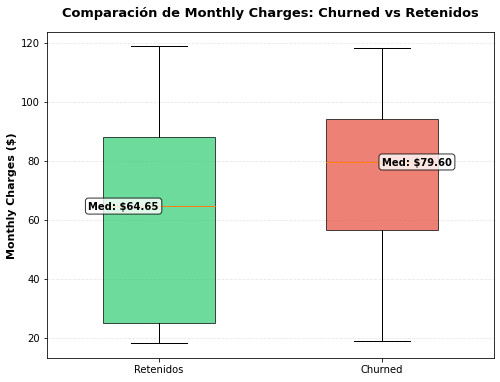

In [ ]:
plt.figure(figsize=(8, 6))

data_boxplot = [retained_customers['monthly_charges'], 
                churned_customers['monthly_charges']]
bp = plt.boxplot(data_boxplot, labels=['Retenidos', 'Churned'], 
                 patch_artist=True, widths=0.5)

# Colorear boxes
colors = ['#2ecc71', '#e74c3c']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.ylabel('Monthly Charges ($)', fontweight='bold', fontsize=11)
plt.title('Comparación de Monthly Charges: Churned vs Retenidos', 
          fontweight='bold', fontsize=13, pad=15)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Añadir estadísticas
median_retained = retained_customers['monthly_charges'].median()
median_churned = churned_customers['monthly_charges'].median()
plt.text(1, median_retained, f'Med: ${median_retained:.2f}', 
         ha='right', va='center', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.text(2, median_churned, f'Med: ${median_churned:.2f}', 
         ha='left', va='center', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

## 7.2 Impacto churn sobre CLTV 


In [ ]:
# 2. CHURN RATE PONDERADO POR CLTV
total_cltv = df['cltv'].sum() # Valor total de TODOS los clientes
cltv_churned = churned_customers['cltv'].sum() # Valor total de LOS CLIENTES PERDIDOS

churn_rate_basico = (len(churned_customers) / len(df)) * 100 # porcentaje de clientes perdidos
churn_rate_cltv_ponderado = (cltv_churned / total_cltv) * 100 # porcentaje de CLTV perdido

print("\n📈 2. CHURN RATE")
print("-" * 80)
print(f"   Porcentaje de clientes perdidos:  {churn_rate_basico:.2f}%")
print(f"   Porcentaje de CLTV perdido:       {churn_rate_cltv_ponderado:.2f}%")
print(f"   Diferencia:                       {abs(churn_rate_cltv_ponderado - churn_rate_basico):.2f} puntos porcentuales")

if churn_rate_cltv_ponderado > churn_rate_basico:
    print(f"   ⚠️  CRÍTICO: La perdida del {churn_rate_basico:.2f}% de los clientes supone una perdida del CLTV del {churn_rate_cltv_ponderado:.2f}%")
else:
    print(f"   ✅ Positivo : La perdida del {churn_rate_basico:.2f}% de los clientes supone una perdida del CLTV del {churn_rate_cltv_ponderado:.2f}%")



📈 2. CHURN RATE
--------------------------------------------------------------------------------
   Porcentaje de clientes perdidos:  26.52%
   Porcentaje de CLTV perdido:       25.00%
   Diferencia:                       1.52 puntos porcentuales
   ✅ Positivo : La perdida del 26.52% de los clientes supone una perdida del CLTV del 25.00%


In [ ]:
# 3. COMPARACIÓN CLTV MEDIO
cltv_medio_churned = churned_customers['cltv'].mean()
cltv_medio_retained = retained_customers['cltv'].mean()
diferencia_cltv = cltv_medio_churned - cltv_medio_retained
ratio_cltv = (cltv_medio_churned / cltv_medio_retained) * 100

print("\n💎 3. COMPARACIÓN CLTV MEDIO")
print("-" * 80)
print(f"   CLTV medio - Clientes CHURNED:   ${cltv_medio_churned:,.2f}")
print(f"   CLTV medio - Clientes RETENIDOS: ${cltv_medio_retained:,.2f}")
print(f"   Diferencia:                      ${diferencia_cltv:,.2f}")
print(f"   Ratio:                           {ratio_cltv:.2f}%")


💎 3. COMPARACIÓN CLTV MEDIO
--------------------------------------------------------------------------------
   CLTV medio - Clientes CHURNED:   $4,149.23
   CLTV medio - Clientes RETENIDOS: $4,491.44
   Diferencia:                      $-342.21
   Ratio:                           92.38%


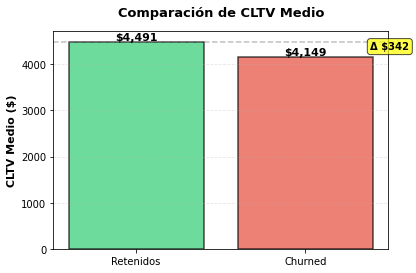

In [ ]:
# 2. BARRAS: CLTV Medio - Churned vs Retenidos
plt.figure(figsize=(6, 4))
categories = ['Retenidos', 'Churned']
cltv_values = [cltv_medio_retained, cltv_medio_churned]
bars = plt.bar(categories, cltv_values, color=['#2ecc71', '#e74c3c'], 
               alpha=0.7, edgecolor='black', linewidth=1.5)

plt.ylabel('CLTV Medio ($)', fontweight='bold', fontsize=11)
plt.title('Comparación de CLTV Medio', fontweight='bold', fontsize=13, pad=15)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Añadir valores en las barras
for bar, value in zip(bars, cltv_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${value:,.0f}',
             ha='center', va='bottom', fontweight='bold', fontsize=11)


# Añadir diferencia
plt.axhline(y=cltv_medio_retained, color='gray', linestyle='--', alpha=0.5)
plt.text(1.5, (cltv_medio_retained + cltv_medio_churned)/2, 
         f'Δ ${abs(diferencia_cltv):,.0f}',
         ha='center', fontweight='bold', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.show()

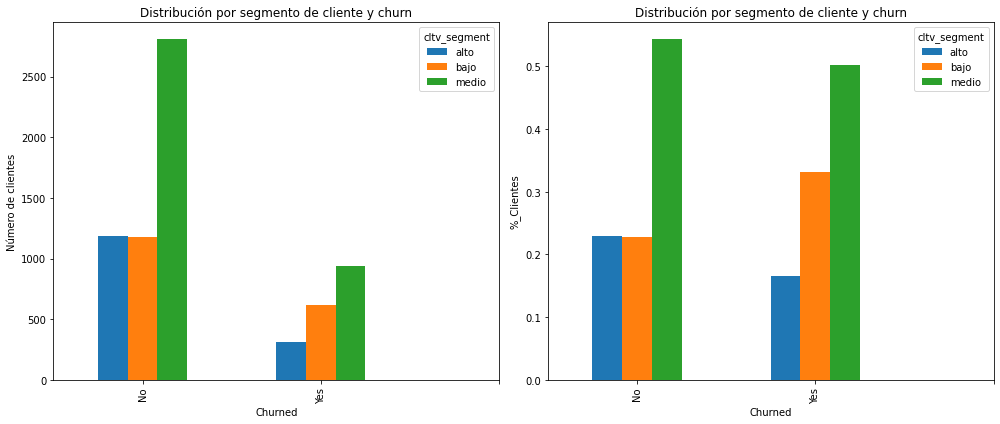

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(14,6))

# 1. Número de clientes por segmento y churn
df.groupby("churn_label")["cltv_segment"].value_counts().unstack().plot(kind="bar",ax=axes[0])
axes[0].set_title("Distribución por segmento de cliente y churn")
axes[0].set_xticks(range(3))
axes[0].set_xlabel("Churned")
axes[0].set_ylabel("Número de clientes")

# 2. Porcentaje de clientes por segmento y churn
df.groupby("churn_label")["cltv_segment"].value_counts(normalize=True).unstack().plot(kind="bar",ax=axes[1])
axes[1].set_title("Distribución por segmento de cliente y churn")
axes[1].set_xticks(range(3))
# rotation of x-axis labels

axes[1].set_xlabel("Churned")
axes[1].set_ylabel("%_Clientes")
plt.tight_layout()
plt.show()


## 7.3 Impacto churn sobre monthly_charges

> Analisis de la variable monthly_charges

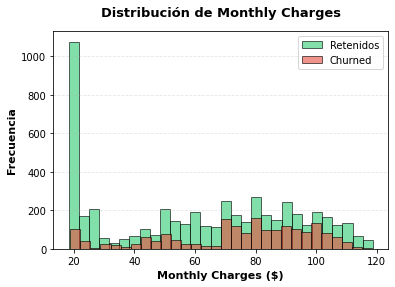

In [ ]:
# 3. HISTOGRAMA: Distribución de Monthly Charges
plt.figure(figsize=(6, 4))
plt.hist(retained_customers['monthly_charges'], bins=30, alpha=0.6, 
         label='Retenidos', color='#2ecc71', edgecolor='black')
plt.hist(churned_customers['monthly_charges'], bins=30, alpha=0.6, 
         label='Churned', color='#e74c3c', edgecolor='black')

plt.xlabel('Monthly Charges ($)', fontweight='bold', fontsize=11)
plt.ylabel('Frecuencia', fontweight='bold', fontsize=11)
plt.title('Distribución de Monthly Charges', fontweight='bold', 
          fontsize=13, pad=15)
plt.legend(loc='upper right', fontsize=10)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.show()


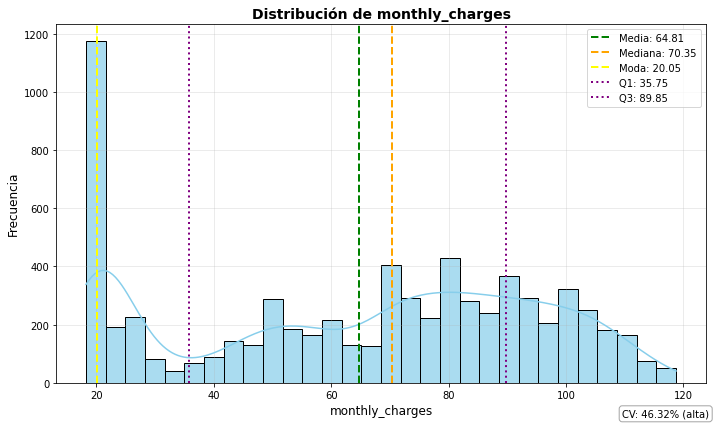


RESUMEN ESTADÍSTICO DE 'monthly_charges':
Observaciones: 7,033
Media:         64.81
Mediana:       70.35
Moda:          20.05
Desv. Std:     30.02
Q1:            35.75
Q3:            89.85
Rango IQR:     54.10
Mínimo:        18.25
Máximo:        118.75
Coef. Variación: 46.32% (alta)

ANÁLISIS DE LA DISTRIBUCIÓN:
------------------------------
Diferencia |Media - Mediana|: 5.54
→ Distribución con SESGO NEGATIVO (cola izquierda)
→ Recomendación: MEDIANA para imputación
→ CV alto: cautela al usar la media como resumen.


{'mean': 64.80854542869331,
 'median': 70.35,
 'mode': 20.05,
 'q1': 35.75,
 'q3': 89.85,
 'std': 30.021834800090062,
 'min': 18.25,
 'max': 118.75,
 'count': 7033,
 'iqr': 54.099999999999994,
 'cv': 46.32388306434387,
 'cv_valid': True,
 'cv_category': 'alta'}

In [ ]:
sp.plot_distribution_with_stats(df, "monthly_charges")

- Corte 1: $20 (La Moda)
    - Valor: $20.05
    - Razón: Es el precio MÁS FRECUENTE en nuestra base de datos
    - Captura: Clientes en plan más popular (probablemente plan básico de entrada)

- Corte 2: $35.75 (Q1 - Primer Cuartil)
    - Valor: $35.75
    - Razón: El 25% de clientes paga menos que esto
    - Captura: Clientes de bajo gasto, entre moda y primer cuartil

- Corte 3: $70.35 (Mediana - Q2)
    - Valor: $70.35
    - Razón: El 50% de clientes está por debajo, 50% por encima
    - Captura: Segmento medio, el "centro" de la distribución

- Corte 4: $89.85 (Q3 - Tercer Cuartil)
    - Valor: $89.85
    - Razón: Solo el 25% de clientes paga más que esto
    - Captura: Clientes de medio-alto gasto

- Corte 5: $90+ (Premium)
    - Valor: Por encima de Q3
    - Razón: Los clientes más valiosos (top 25%)
    - Captura: Segmento premium que genera más ingresos

| Segmento       | % Esperado | Características              |
|----------------|------------|------------------------------|
| Entrada ($0-20) | ~15-20%    | Plan más común (en la moda)  |
| Bajo ($20-36)   | ~25%       | Entre moda y Q1              |
| Medio ($36-70)  | ~25%       | Entre Q1 y mediana           |
| Medio-Alto ($70-90) | ~25%   | Entre mediana y Q3           |
| Premium ($90+)  | ~25%       | Por encima de Q3 (top clientes) |


In [ ]:

bins = [0, 20, 35.75, 70.35, 89.85, np.inf]
labels = ['Entrada', 'Bajo', 'Medio', 'Medio-Alto', 'Premium']

df['precio_segmento'] = pd.cut(df['monthly_charges'], bins=bins, labels=labels)
churned_customers['precio_segmento'] = pd.cut(churned_customers['monthly_charges'], bins=bins, labels=labels)

print("\n📊 Criterios de Segmentación (basados en estadísticas reales):")
print("   • Entrada:     $0 - $20    (hasta la moda)")
print("   • Bajo:        $20 - $36   (moda hasta Q1)")
print("   • Medio:       $36 - $70   (Q1 hasta mediana)")
print("   • Medio-Alto:  $70 - $90   (mediana hasta Q3)")
print("   • Premium:     $90+        (por encima de Q3)")
print("   → Cada segmento tiene distribución equilibrada de clientes\n")

segmento_analysis = df.groupby('precio_segmento').agg({'churn_value': ['sum', 'mean', 'count']}).round(4)

segmento_analysis.columns = ['Total_Churned', 'Churn_Rate', 'Total_Clientes']
segmento_analysis['Churn_Rate'] = segmento_analysis['Churn_Rate'] * 100


segmento_analysis


📊 Criterios de Segmentación (basados en estadísticas reales):
   • Entrada:     $0 - $20    (hasta la moda)
   • Bajo:        $20 - $36   (moda hasta Q1)
   • Medio:       $36 - $70   (Q1 hasta mediana)
   • Medio-Alto:  $70 - $90   (mediana hasta Q3)
   • Premium:     $90+        (por encima de Q3)
   → Cada segmento tiene distribución equilibrada de clientes



,Total_Churned,Churn_Rate,Total_Clientes
precio_segmento,,,
Entrada,57.0,8.76,651
Bajo,141.0,12.69,1111
Medio,437.0,24.65,1773
Medio-Alto,654.0,37.39,1749
Premium,576.0,32.93,1749



## 7.4 Impacto churn sobre segmentación de precios


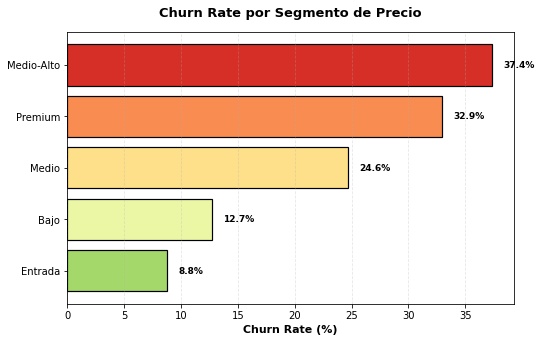

In [ ]:
# 4. CHURN RATE POR SEGMENTO DE PRECIO
plt.figure(figsize=(8, 5))
segmento_churn = segmento_analysis['Churn_Rate'].sort_values(ascending=True)
colors_gradient = plt.cm.RdYlGn_r(np.linspace(0.3, 0.9, len(segmento_churn)))

bars = plt.barh(range(len(segmento_churn)), segmento_churn.values, 
                color=colors_gradient, edgecolor='black', linewidth=1.2)
plt.yticks(range(len(segmento_churn)), segmento_churn.index)
plt.xlabel('Churn Rate (%)', fontweight='bold', fontsize=11)
plt.title('Churn Rate por Segmento de Precio', fontweight='bold', 
          fontsize=13, pad=15)
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Añadir valores
for i, (bar, value) in enumerate(zip(bars, segmento_churn.values)):
    plt.text(value + 1, bar.get_y() + bar.get_height()/2, 
             f'{value:.1f}%', va='center', fontweight='bold', fontsize=9)


## 7.5 Impacto churn sobre perdida de ingresos

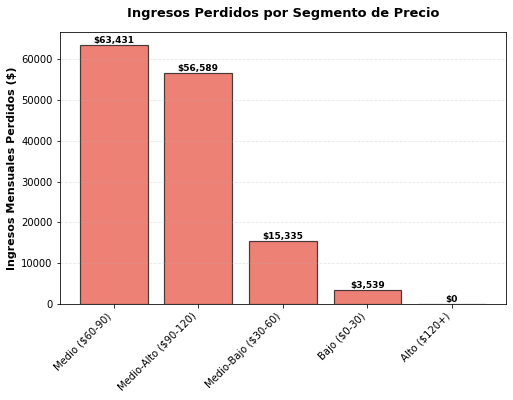

In [ ]:
# 5. INGRESOS PERDIDOS POR SEGMENTO
ingresos_por_segmento = churned_customers.groupby('precio_segmento')['monthly_charges'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
bars = plt.bar(range(len(ingresos_por_segmento)), ingresos_por_segmento.values,
               color='#e74c3c', alpha=0.7, edgecolor='black', linewidth=1.2)
plt.xticks(range(len(ingresos_por_segmento)), ingresos_por_segmento.index, rotation=45, ha='right')
plt.ylabel('Ingresos Mensuales Perdidos ($)', fontweight='bold', fontsize=11)
plt.title('Ingresos Perdidos por Segmento de Precio', fontweight='bold', 
          fontsize=13, pad=15)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Añadir valores
for bar, value in zip(bars, ingresos_por_segmento.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${value:,.0f}',
             ha='center', va='bottom', fontweight='bold', fontsize=9, rotation=0)


> recap

In [ ]:

print("\n" + "="*80)
print("📋 RESUMEN EJECUTIVO")
print("="*80)
print(f"""
IMPACTO FINANCIERO DEL CHURN:
• Pérdida mensual:           ${ingresos_perdidos_mensuales:,.2f}
• Pérdida acumulada:         ${ingresos_perdidos_totales:,.2f}
• CLTV comprometido:         ${cltv_churned:,.2f}

PERFIL DE CLIENTES PERDIDOS:
• CLTV medio:                ${cltv_medio_churned:,.2f} ({ratio_cltv:.1f}% vs retenidos)
• Cargo mensual promedio:    ${churned_customers['monthly_charges'].mean():,.2f}
• Tenure promedio:           {churned_customers['tenure_months'].mean():.1f} meses

RECOMENDACIONES:
{f'⚠️  PRIORIDAD ALTA: Enfocar retención en clientes de alto CLTV' if churn_rate_cltv_ponderado > churn_rate_basico else '✅ Continuar estrategia actual de retención'}
• Segmento más crítico:      {segmento_churn.idxmax()} (Churn: {segmento_churn.max():.1f}%)
• Mayor pérdida financiera:  {ingresos_por_segmento.idxmax()}
""")
print("="*80)


📋 RESUMEN EJECUTIVO

IMPACTO FINANCIERO DEL CHURN:
• Pérdida mensual:           $138,893.45
• Pérdida acumulada:         $2,848,780.35
• CLTV comprometido:         $4,149.23

PERFIL DE CLIENTES PERDIDOS:
• CLTV medio:                $4,149.23 (92.4% vs retenidos)
• Cargo mensual promedio:    $74.47
• Tenure promedio:           18.0 meses

RECOMENDACIONES:
✅ Continuar estrategia actual de retención
• Segmento más crítico:      Medio ($60-90) (Churn: 33.8%)
• Mayor pérdida financiera:  Medio ($60-90)



# 8. Retencion y predicciones 

In [ ]:
# 1. CLIENTES EN RIESGO (Churn Score > 70)
umbral_riesgo_alto = 70
clientes_riesgo = df[df['churn_score'] > umbral_riesgo_alto].copy()
total_clientes = len(df)
pct_riesgo = (len(clientes_riesgo) / total_clientes) * 100

print("\n🚨 1. CLIENTES EN RIESGO (Churn Score > 70)")
print("-" * 80)
print(f"   Total clientes en riesgo:        {len(clientes_riesgo):,}")
print(f"   % del total de clientes:         {pct_riesgo:.2f}%")
print(f"   Churn Score promedio (en riesgo): {clientes_riesgo['churn_score'].mean():.2f}")
print(f"   CLTV en riesgo:                  ${clientes_riesgo['cltv'].sum():,.2f}")
print(f"   Ingresos mensuales en riesgo:    ${clientes_riesgo['monthly_charges'].sum():,.2f}")


🚨 1. CLIENTES EN RIESGO (Churn Score > 70)
--------------------------------------------------------------------------------
   Total clientes en riesgo:        2,413
   % del total de clientes:         34.31%
   Churn Score promedio (en riesgo): 81.93
   CLTV en riesgo:                  $10,296,272.00
   Ingresos mensuales en riesgo:    $168,257.65


In [ ]:
# 2. CLIENTES DE ALTO VALOR EN RIESGO (CLTV top 20%)
cltv_percentil_80 = df['cltv'].quantile(0.80)
clientes_alto_valor = df[df['cltv'] >= cltv_percentil_80].copy()
clientes_alto_valor_riesgo = clientes_alto_valor[clientes_alto_valor['churn_score'] > umbral_riesgo_alto]

pct_alto_valor_riesgo = (len(clientes_alto_valor_riesgo) / len(clientes_alto_valor)) * 100

print("\n💎 2. CLIENTES DE ALTO VALOR EN RIESGO (CLTV Top 20%)")
print("-" * 80)
print(f"   Umbral CLTV top 20%:             ${cltv_percentil_80:,.2f}")
print(f"   Total clientes alto valor:       {len(clientes_alto_valor):,}")
print(f"   Alto valor EN RIESGO:            {len(clientes_alto_valor_riesgo):,}")
print(f"   % alto valor en riesgo:          {pct_alto_valor_riesgo:.2f}%")
print(f"   CLTV comprometido (alto valor):  ${clientes_alto_valor_riesgo['cltv'].sum():,.2f}")

if pct_alto_valor_riesgo > 15:
    print(f"   ⚠️  CRÍTICO: Más del 15% de clientes VIP en riesgo")
elif pct_alto_valor_riesgo > 10:
    print(f"   ⚠️  ALERTA: Atención prioritaria a clientes VIP")
else:
    print(f"   ✅ Aceptable: Retención VIP funcionando")


💎 2. CLIENTES DE ALTO VALOR EN RIESGO (CLTV Top 20%)
--------------------------------------------------------------------------------
   Umbral CLTV top 20%:             $5,540.00
   Total clientes alto valor:       1,409
   Alto valor EN RIESGO:            423
   % alto valor en riesgo:          30.02%
   CLTV comprometido (alto valor):  $2,487,115.00
   ⚠️  CRÍTICO: Más del 15% de clientes VIP en riesgo


In [ ]:

# 3. CATEGORIZACIÓN DE RIESGO
df['categoria_riesgo'] = pd.cut(df['churn_score'], 
                                 bins=[0, 50, 70, 100],
                                 labels=['Bajo', 'Medio', 'Alto'])

distribucion_riesgo = df['categoria_riesgo'].value_counts()
pct_distribucion = (distribucion_riesgo / len(df) * 100).round(2)

print("\n📊 3. DISTRIBUCIÓN POR NIVEL DE RIESGO")
print("-" * 80)
for categoria in ['Bajo', 'Medio', 'Alto']:
    if categoria in distribucion_riesgo.index:
        count = distribucion_riesgo[categoria]
        pct = pct_distribucion[categoria]
        print(f"   Riesgo {categoria:6s}: {count:5,} clientes ({pct:5.2f}%)")


📊 3. DISTRIBUCIÓN POR NIVEL DE RIESGO
--------------------------------------------------------------------------------
   Riesgo Bajo  : 2,594 clientes (36.88%)
   Riesgo Medio : 2,026 clientes (28.81%)
   Riesgo Alto  : 2,413 clientes (34.31%)


In [ ]:

# 4. SEGMENTACIÓN DE CLIENTES EN RIESGO
print("\n🔍 4. SEGMENTACIÓN DE CLIENTES EN RIESGO")
print("-" * 80)

# Por Contrato
print("\n   📋 Por Tipo de Contrato:")
riesgo_contrato = clientes_riesgo.groupby('contract').agg({
    'index': 'count',
    'cltv': 'sum',
    'monthly_charges': 'sum',
    'churn_score': 'mean'
}).round(2)
riesgo_contrato.columns = ['Clientes', 'CLTV_Total', 'Ingresos_Mensuales', 'Churn_Score_Medio']
riesgo_contrato = riesgo_contrato.sort_values('Clientes', ascending=False)
print(riesgo_contrato)

# Por Método de Pago
print("\n   💳 Por Método de Pago:")
riesgo_pago = clientes_riesgo.groupby('payment_method').agg({
    'index': 'count',
    'cltv': 'sum',
    'churn_score': 'mean'
}).round(2)
riesgo_pago.columns = ['Clientes', 'CLTV_Total', 'Churn_Score_Medio']
riesgo_pago = riesgo_pago.sort_values('Clientes', ascending=False)
print(riesgo_pago)

# Por Servicio de Internet
print("\n   🌐 Por Servicio de Internet:")
riesgo_internet = clientes_riesgo.groupby('internet_service').agg({
    'index': 'count',
    'cltv': 'sum',
    'churn_score': 'mean'
}).round(2)
riesgo_internet.columns = ['Clientes', 'CLTV_Total', 'Churn_Score_Medio']
riesgo_internet = riesgo_internet.sort_values('Clientes', ascending=False)
print(riesgo_internet)


🔍 4. SEGMENTACIÓN DE CLIENTES EN RIESGO
--------------------------------------------------------------------------------

   📋 Por Tipo de Contrato:
                Clientes  CLTV_Total  Ingresos_Mensuales  Churn_Score_Medio
contract                                                                   
Month-to-month      1737   7093026.0           122750.90              83.32
One year             336   1539053.0            23933.40              79.74
Two year             318   1557741.0            20012.65              76.89

   💳 Por Método de Pago:
                           Clientes  CLTV_Total  Churn_Score_Medio
payment_method                                                    
Electronic check               1104   4625284.0              83.36
Mailed check                    464   1917171.0              81.12
Bank transfer (automatic)       433   1955127.0              80.29
Credit card (automatic)         411   1795289.0              80.72

   🌐 Por Servicio de Internet:
          

In [ ]:



contrato_critico = riesgo_contrato.index[0]
pago_critico = riesgo_pago.index[0]

print(f"""
SITUACIÓN ACTUAL:
• Clientes totales en riesgo (>70):  {len(clientes_riesgo):,} ({pct_riesgo:.2f}%)
• Clientes VIP en riesgo:            {len(clientes_alto_valor_riesgo):,} ({pct_alto_valor_riesgo:.2f}% del top 20%)
• CLTV total comprometido:           ${clientes_riesgo['cltv'].sum():,.2f}
• Ingresos mensuales en riesgo:      ${clientes_riesgo['monthly_charges'].sum():,.2f}

SEGMENTOS MÁS CRÍTICOS:
• Tipo de contrato:                  {contrato_critico} ({int(riesgo_contrato.iloc[0]['Clientes']):,} clientes)
• Método de pago:                    {pago_critico} ({int(riesgo_pago.iloc[0]['Clientes']):,} clientes)
• % Distribución riesgo alto:        {pct_distribucion.get('Alto', 0):.1f}%

ACCIONES RECOMENDADAS:
1. 🚨 URGENTE: Contactar inmediatamente a los {len(clientes_alto_valor_riesgo):,} clientes VIP en riesgo
2. 📞 Campaña de retención para {contrato_critico} (mayor volumen en riesgo)
3. 💳 Revisar fricción en método de pago {pago_critico}
4. 🎁 Programa de incentivos para los top 20 clientes priorizados arriba
5. 📊 Monitoreo semanal de clientes con churn score > 70
""")
print("="*80)


SITUACIÓN ACTUAL:
• Clientes totales en riesgo (>70):  2,413 (34.31%)
• Clientes VIP en riesgo:            423 (30.02% del top 20%)
• CLTV total comprometido:           $10,296,272.00
• Ingresos mensuales en riesgo:      $168,257.65

SEGMENTOS MÁS CRÍTICOS:
• Tipo de contrato:                  Month-to-month (1,737 clientes)
• Método de pago:                    Electronic check (1,104 clientes)
• % Distribución riesgo alto:        34.3%

ACCIONES RECOMENDADAS:
1. 🚨 URGENTE: Contactar inmediatamente a los 423 clientes VIP en riesgo
2. 📞 Campaña de retención para Month-to-month (mayor volumen en riesgo)
3. 💳 Revisar fricción en método de pago Electronic check
4. 🎁 Programa de incentivos para los top 20 clientes priorizados arriba
5. 📊 Monitoreo semanal de clientes con churn score > 70

